In [29]:
import ca
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


transfer = ca.CA()
bettingAI = pd.read_csv("./datasets/bettingAI_prov_ageclass.csv", index_col=0)


In [36]:
print(bettingAI)

          cl_25-30  cl_31-35  cl_36-40  cl_41-45  cl_46+
Regione                                                 
Abr             99         0         0         0       0
Clabr            0         0         0         0      99
Camp             0         0       217       106       0
Emil           109         0       108         0     167
Friu             0         0       104         0     114
Laz              0         0       100         0       0
Lig              0         0         0         0      95
Lomb           134         0         0         0     128
Piem             0       101         0         0       0
Puglia           0       258       106         0     102
Sard             0         0         0         0     128
 Sicilia         0       116       117         0     101
Tosc             0         0       206         0       0
Trent            0       135         0         0       0
Umb              0       106         0         0       0
Ven              0        92   

In [31]:

transfer.fit(bettingAI)
print('centered correspondence matrix:')
print(transfer.centr_corrspnd_mat_)

print('Pearson residual:')
print(transfer.pearson_resd_)

pcs_row, pcs_col = \
    transfer.get_princpl_coords_df(row_categories=bettingAI.index,
                                   col_categories=bettingAI.columns)
print('Principal coordinates of row variables in DataFrame:')
print(pcs_row)
print(pcs_col)


centered correspondence matrix:
[[ 0.0266906  -0.00722237 -0.0101721  -0.00094749 -0.00834863]
 [-0.00305699 -0.00722237 -0.0101721  -0.00094749  0.02139896]
 [-0.00997383 -0.0235639   0.03201655  0.02875966 -0.02723847]
 [ 0.02089497 -0.02801405 -0.00700351 -0.00367511  0.01779771]
 [-0.00673156 -0.01590381  0.00885082 -0.00208639  0.01587095]
 [-0.00308787 -0.00729533  0.01977322 -0.00095706 -0.00843296]
 [-0.00293348 -0.00693056 -0.00976111 -0.00090921  0.02053436]
 [ 0.0321742  -0.01911376 -0.02692012 -0.0025075   0.01636717]
 [-0.00311875  0.02298028 -0.0103776  -0.00096663 -0.00851729]
 [-0.01438949  0.04352782 -0.01602985 -0.0044599  -0.00864857]
 [-0.00395248 -0.00933802 -0.01315181 -0.00122504  0.02766734]
 [-0.0103135   0.01048938  0.00083824 -0.00319658  0.00218246]
 [-0.00636102 -0.01502837  0.04073284 -0.00197154 -0.01737191]
 [-0.00416863  0.03071621 -0.01387105 -0.00129203 -0.0113845 ]
 [-0.00327315  0.02411792 -0.01089134 -0.00101448 -0.00893894]
 [-0.00839902  0.007800

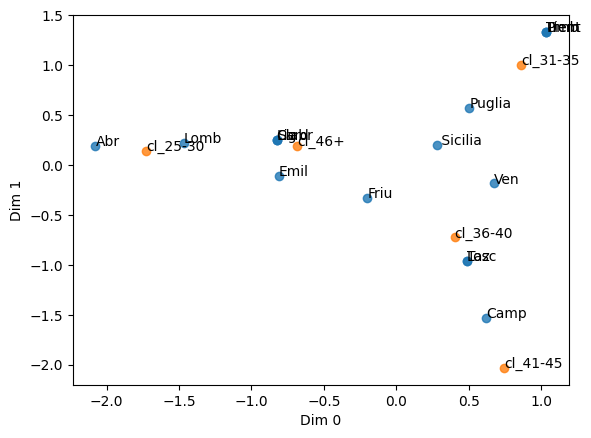

In [32]:

fig, ax = plt.subplots()
sns.regplot(x='Dim 0', y='Dim 1', data=pcs_row, fit_reg=False, ax=ax)
sns.regplot(x='Dim 0', y='Dim 1', data=pcs_col, fit_reg=False, ax=ax)
for i, txt in enumerate(list(bettingAI.index)):
    ax.annotate(txt + '',
                (pcs_row.iloc[i]['Dim 0'], pcs_row.iloc[i]['Dim 1']))
for i, txt in enumerate(list(bettingAI.columns)):
    ax.annotate(txt + '',
                (pcs_col.iloc[i]['Dim 0'], pcs_col.iloc[i]['Dim 1']))
ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
plt.show()


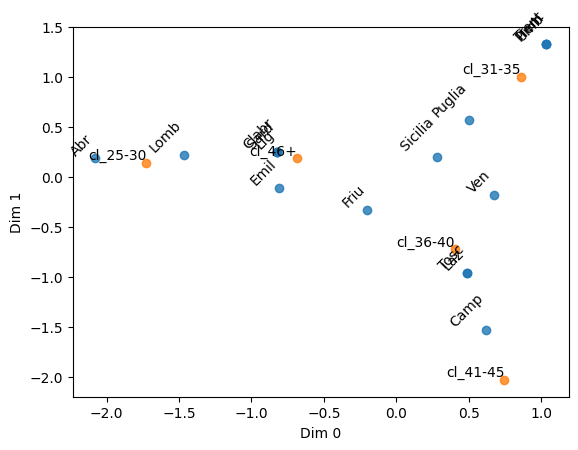

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.regplot(x='Dim 0', y='Dim 1', data=pcs_row, fit_reg=False, ax=ax)
sns.regplot(x='Dim 0', y='Dim 1', data=pcs_col, fit_reg=False, ax=ax)
for i, txt in enumerate(list(bettingAI.index)):
    ax.annotate(txt,
                (pcs_row.iloc[i]['Dim 0'], pcs_row.iloc[i]['Dim 1']),
                rotation=45,  # Rotate the label by 45 degrees
                va='bottom', ha='right')  # Adjust the alignment of the label
for i, txt in enumerate(list(bettingAI.columns)):
    ax.annotate(txt,
                (pcs_col.iloc[i]['Dim 0'], pcs_col.iloc[i]['Dim 1']),
                rotation=0,  # Rotate the label by 45 degrees
                va='bottom', ha='right')  # Adjust the alignment of the label
ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
plt.show()

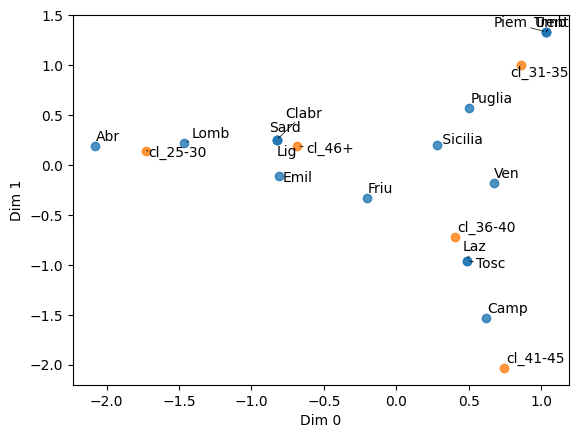

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # Import adjust_text function

fig, ax = plt.subplots()
sns.regplot(x='Dim 0', y='Dim 1', data=pcs_row, fit_reg=False, ax=ax)
sns.regplot(x='Dim 0', y='Dim 1', data=pcs_col, fit_reg=False, ax=ax)
texts = []
for i, txt in enumerate(list(bettingAI.index)):
    texts.append(ax.annotate(txt,
                             (pcs_row.iloc[i]['Dim 0'], pcs_row.iloc[i]['Dim 1'])))
for i, txt in enumerate(list(bettingAI.columns)):
    texts.append(ax.annotate(txt,
                             (pcs_col.iloc[i]['Dim 0'], pcs_col.iloc[i]['Dim 1'])))
ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')

# Adjust the positions of text annotations to minimize overlaps
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

plt.show()

In [42]:
import plotly.graph_objects as go

# Create traces for pcs_row and pcs_col with three dimensions
trace_pcs_row = go.Scatter3d(
    x=pcs_row['Dim 0'], y=pcs_row['Dim 1'], z=pcs_row['Dim 2'], mode='markers', name='Regione')
trace_pcs_col = go.Scatter3d(
    x=pcs_col['Dim 0'], y=pcs_col['Dim 1'], z=pcs_col['Dim 2'], mode='markers', name='Eta')

# Find the range of data along each axis
x_range = [min(pcs_row['Dim 0'].min(), pcs_col['Dim 0'].min()),
           max(pcs_row['Dim 0'].max(), pcs_col['Dim 0'].max())]
y_range = [min(pcs_row['Dim 1'].min(), pcs_col['Dim 1'].min()),
           max(pcs_row['Dim 1'].max(), pcs_col['Dim 1'].max())]
z_range = [min(pcs_row['Dim 2'].min(), pcs_col['Dim 2'].min()),
           max(pcs_row['Dim 2'].max(), pcs_col['Dim 2'].max())]

# Create layout with adjusted axis range to ensure equal aspect ratio and rotate the plot by 30 degrees
layout = go.Layout(title='Principal Component Analysis',
                   scene=dict(
                       xaxis=dict(title='Dim 0', range=x_range),
                       yaxis=dict(title='Dim 1', range=y_range),
                       zaxis=dict(title='Dim 2', range=z_range),
                       aspectmode='cube',  # Ensures equal aspect ratio
                       camera=dict(eye=dict(x=1, y=1, z=0.5),  # Adjust camera eye for rotation
                                   # Specify up direction
                                   up=dict(x=0, y=0, z=1),
                                   # Set projection type
                                   projection=dict(type='perspective'),
                                   ),
                   ),
                   )

# Create figure
fig = go.Figure(data=[trace_pcs_row, trace_pcs_col], layout=layout)

# Show plot
fig.show()

In [33]:
import plotly.graph_objects as go

# Create traces for pcs_row and pcs_col
trace_pcs_row = go.Scatter(
    x=pcs_row['Dim 0'], y=pcs_row['Dim 1'], mode='markers', name='Regione')
trace_pcs_col = go.Scatter(
    x=pcs_col['Dim 0'], y=pcs_col['Dim 1'], mode='markers', name='Eta')

# Find the range of data along each axis
x_range = [min(pcs_row['Dim 0'].min(), pcs_col['Dim 0'].min()),
           max(pcs_row['Dim 0'].max(), pcs_col['Dim 0'].max())]
y_range = [min(pcs_row['Dim 1'].min(), pcs_col['Dim 1'].min()),
           max(pcs_row['Dim 1'].max(), pcs_col['Dim 1'].max())]

# Create annotations for bettingAI index and columns with changed label size and color
annotations = []
for i, txt in enumerate(bettingAI.index):
    annotations.append(dict(x=pcs_row.iloc[i]['Dim 0'], y=pcs_row.iloc[i]['Dim 1'],
                            text=str(txt) + '', showarrow=False, font=dict(size=16, color='blue')))
for i, txt in enumerate(bettingAI.columns):
    annotations.append(dict(x=pcs_col.iloc[i]['Dim 0'], y=pcs_col.iloc[i]['Dim 1'],
                            text=str(txt) + '', showarrow=False, font=dict(size=14, color='green')))

# Create layout with adjusted axis range to ensure equal aspect ratio
layout = go.Layout(title='Principal Component Analysis',
                   xaxis=dict(title='Dim 0', range=x_range),
                   yaxis=dict(title='Dim 1', range=y_range),
                   annotations=annotations)

# Create figure
fig = go.Figure(data=[trace_pcs_row, trace_pcs_col], layout=layout)

# Show plot
fig.show()

In [34]:
import plotly.graph_objects as go

# Create traces for pcs_row and pcs_col
trace_pcs_row = go.Scatter(
    x=pcs_row['Dim 0'], y=pcs_row['Dim 1'], mode='markers', name='Regione')
trace_pcs_col = go.Scatter(
    x=pcs_col['Dim 0'], y=pcs_col['Dim 1'], mode='markers', name='Classe_Eta')

# Define stagger amount for labels
stagger_amount = 0.05

# Create annotations for bettingAI index and columns with staggered label positions
annotations = []
for i, txt in enumerate(bettingAI.index):
    annotations.append(dict(x=pcs_row.iloc[i]['Dim 0'], y=pcs_row.iloc[i]['Dim 1'] + i * stagger_amount,
                            text=str(txt) + '', showarrow=False, font=dict(size=16, color='blue')))
for i, txt in enumerate(bettingAI.columns):
    annotations.append(dict(x=pcs_col.iloc[i]['Dim 0'] + i * stagger_amount, y=pcs_col.iloc[i]['Dim 1'],
                            text=str(txt) + '', showarrow=False, font=dict(size=14, color='green')))

# Create layout with equal aspect ratio
layout = go.Layout(title='Principal Component Analysis',
                   xaxis=dict(title='Dim 0', scaleanchor="y", scaleratio=1),
                   yaxis=dict(title='Dim 1'),
                   annotations=annotations)

# Create figure
fig = go.Figure(data=[trace_pcs_row, trace_pcs_col], layout=layout)

# Show plot
fig.show()

In [35]:
import plotly.graph_objects as go

# Create traces for pcs_row and pcs_col with three dimensions
trace_pcs_row = go.Scatter3d(
    x=pcs_row['Dim 0'], y=pcs_row['Dim 1'], z=pcs_row['Dim 2'], mode='markers', name='Regione')
trace_pcs_col = go.Scatter3d(
    x=pcs_col['Dim 0'], y=pcs_col['Dim 1'], z=pcs_col['Dim 2'], mode='markers', name='Eta')

# Find the range of data along each axis
x_range = [min(pcs_row['Dim 0'].min(), pcs_col['Dim 0'].min()),
           max(pcs_row['Dim 0'].max(), pcs_col['Dim 0'].max())]
y_range = [min(pcs_row['Dim 1'].min(), pcs_col['Dim 1'].min()),
           max(pcs_row['Dim 1'].max(), pcs_col['Dim 1'].max())]
z_range = [min(pcs_row['Dim 2'].min(), pcs_col['Dim 2'].min()),
           max(pcs_row['Dim 2'].max(), pcs_col['Dim 2'].max())]

# Create layout with adjusted axis range to ensure equal aspect ratio
layout = go.Layout(title='Principal Component Analysis',
                   scene=dict(
                       xaxis=dict(title='Dim 0', range=x_range),
                       yaxis=dict(title='Dim 1', range=y_range),
                       zaxis=dict(title='Dim 2', range=z_range),
                       aspectmode='cube'  # Ensures equal aspect ratio
                   ))

# Create annotations for bettingAI index and columns with changed label size and color
annotations = []
for i, txt in enumerate(bettingAI.index):
    annotations.append(dict(x=pcs_row.iloc[i]['Dim 0'], y=pcs_row.iloc[i]['Dim 1'], z=pcs_row.iloc[i]['Dim 2'],
                            text=str(txt) + '', xanchor='right', yanchor='bottom',
                            font=dict(size=16, color='blue')))
for i, txt in enumerate(bettingAI.columns):
    annotations.append(dict(x=pcs_col.iloc[i]['Dim 0'], y=pcs_col.iloc[i]['Dim 1'], z=pcs_col.iloc[i]['Dim 2'],
                            text=str(txt) + '', xanchor='right', yanchor='bottom',
                            font=dict(size=14, color='green')))

# Add annotations to the layout
layout['scene']['annotations'] = annotations

# Set width and height of the figure
fig = go.Figure(data=[trace_pcs_row, trace_pcs_col], layout=layout)
fig.update_layout(width=800, height=800)

# Show plot
fig.show()